# Introduction

Washington, D.C. has communal bike sharing stations where you can rent bicycles by the hour or day. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.fanaee.com/) now at the University of Oslo, Norway compiled this data into a CSV file for this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. The data can be found from the [University of California, Irvine's website](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

I will try to predict the total number of bikes people rented in a given hour. I will predict the `cnt` column using all of the other columns, except for `casual` and `registered`. To accomplish this, I will create a few different machine learning models and evaluate their performance.


> Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
>
> Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

| Column Name | Description                                                                                                                                 |
|-------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| instant     | record index                                                                                                                                |
| dteday      | date                                                                                                                                        |
| season      | season (1:winter, 2:spring, 3:summer, 4:fall)                                                                                               |
| yr          | year (0: 2011, 1:2012)                                                                                                                      |
| mnth        | month ( 1 to 12)                                                                                                                            |
| hr          | hour (0 to 23)                                                                                                                              |
| holiday     | weather day is holiday or not (extracted from [Web Link])                                                                                   |
| weekday     | day of the week                                                                                                                             |
| workingday  | if day is neither weekend nor holiday is 1, otherwise is 0                                                                                  |
| weathersit  | 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                                                          |
|             | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                                             |
|             | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                                                  |
|             | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                                                               |
| temp        | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)           |
| atemp       | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)  |
| hum         | Normalized humidity. The values are divided to 100 (max)                                                                                    |
| windspeed   | Normalized wind speed. The values are divided to 67 (max)                                                                                   |
| casual      | count of casual users                                                                                                                       |
| registered  | count of registered users                                                                                                                   |
| cnt         | count of total rental bikes including both casual and registered                                                                            |


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = 20

In [4]:
bike_rentals = pd.read_csv('data/hour.csv')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


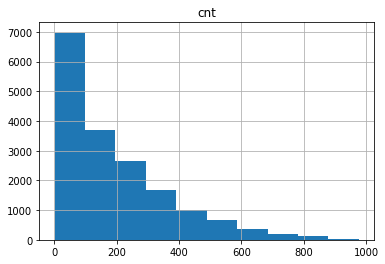

In [5]:
display(bike_rentals.head())
bike_rentals.hist(column='cnt')
plt.show()

In [6]:
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [7]:
def label_hour(hour):
    if (hour < 0) | (hour > 24):
        return -1
    elif (hour < 6):
        return 4
    elif (hour < 12):
        return 1
    elif (hour < 18):
        return 2
    else:
        return 3

In [8]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(label_hour)
bike_rentals['time_label'].describe()

count    17379.000000
mean         2.492548
std          1.115284
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: time_label, dtype: float64